In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Instalar simpledbf en el sistema
! pip install simpledbf

In [4]:
import simpledbf

In [5]:
#dbf = simpledbf.Dbf5("Datos/enpecyt2017_bd_dbf/enpecyt2017_cs.dbf")
#dbf = simpledbf.Dbf5("Datos/enpecyt2017_bd_dbf/enpecyt2017_vivhog.dbf")
dbf = simpledbf.Dbf5("Datos/enpecyt2017_bd_dbf/enpecyt2017_cb1.dbf", codec = "cp1252")

In [6]:
dbf

In [7]:
# Convertirlo a DataFrame
df = dbf.to_dataframe()

In [8]:
df[:5]

,CD_A,PER,ENT,CON,V_SEL,N_HOG,N_REN,S3P1,S3P1_2,S3P2,...,S4P17_6,S4P17_7,S4P17_8,S4P17_9,S4P17_10,S4P17_11,S4P17_12,S4P17_13,S4P17_14,FAC
0,14,1117,01,40018,3,1,01,3,3,NaN,...,2,3,3,2,2,2,2,1,2,5072
1,14,1117,01,40018,4,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,5072
2,14,1117,01,40018,2,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,7608
3,14,1117,01,40018,1,1,03,4,3,NaN,...,2,2,3,3,3,2,2,3,3,10144
4,14,1117,01,40018,5,1,02,3,3,NaN,...,3,3,3,3,3,3,1,3,3,5072


In [9]:
# Número de personas que no les interesa el deporte
no_deporte = df[df["S4P1_1"] == 4]["FAC"].sum()

In [10]:
# Número de viviendas en total
viv_tot = df["FAC"].sum()

In [11]:
# Porcentaje de personas a las que no les gusta el deporte
no_deporte / viv_tot * 100

21.89403407793798

In [12]:
grupos = df.groupby("S4P1_1")

In [13]:
grupos.groups

{1: Int64Index([  24,   31,   38,   76,   82,   88,   90,  103,  108,  114,
             ...
             2791, 2795, 2802, 2804, 2812, 2814, 2821, 2826, 2838, 2841],
            dtype='int64', length=317),
 2: Int64Index([   0,    1,    2,    3,    4,    5,    8,   14,   18,   26,
             ...
             2807, 2815, 2817, 2823, 2827, 2830, 2839, 2840, 2845, 2849],
            dtype='int64', length=773),
 3: Int64Index([   9,   15,   16,   19,   20,   21,   22,   23,   32,   33,
             ...
             2834, 2835, 2836, 2837, 2842, 2846, 2847, 2850, 2851, 2852],
            dtype='int64', length=1153),
 4: Int64Index([   6,    7,   10,   11,   12,   13,   17,   25,   28,   29,
             ...
             2806, 2808, 2822, 2824, 2829, 2831, 2832, 2843, 2844, 2848],
            dtype='int64', length=610)}

In [14]:
# Devuelve el DataFrame del grupo 2
# grupos.get_group(2)

In [15]:
parciales = grupos["FAC"].sum()
parciales

S4P1_1
1     4725246
2     9506615
3    14712551
4     8113464
Name: FAC, dtype: int64

In [16]:
barras = parciales / viv_tot * 100

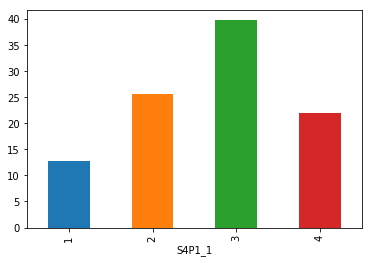

In [17]:
barras.plot(kind = "bar")

In [18]:
barras.index = ['Muy grande', 'Grande', 'Moderado', 'Nulo']
barras

Muy grande    12.750990
Grande        25.653427
Moderado      39.701550
Nulo          21.894034
Name: FAC, dtype: float64

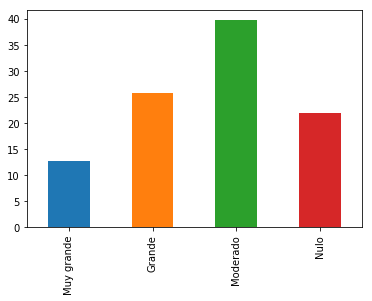

In [19]:
barras.plot(kind = "bar")

In [20]:
grupos = df.groupby("S4P1_4")

In [21]:
nbase = grupos.get_group(4)

In [22]:
filtrada = nbase.loc[:, ["S4P1_1_1A", "FAC"]]

In [23]:
filtrada[:7]

,S4P1_1_1A,FAC
1,2,5072
5,0,4792
6,2,9584
7,2,4792
10,2,6724
12,1,10086
13,0,6724


In [24]:
filtrada[filtrada["S4P1_1_1A"] == 1]["FAC"].sum()

1869708

In [25]:
df[:5]

,CD_A,PER,ENT,CON,V_SEL,N_HOG,N_REN,S3P1,S3P1_2,S3P2,...,S4P17_6,S4P17_7,S4P17_8,S4P17_9,S4P17_10,S4P17_11,S4P17_12,S4P17_13,S4P17_14,FAC
0,14,1117,01,40018,3,1,01,3,3,NaN,...,2,3,3,2,2,2,2,1,2,5072
1,14,1117,01,40018,4,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,5072
2,14,1117,01,40018,2,1,01,2,6,NaN,...,3,3,3,3,3,3,2,3,3,7608
3,14,1117,01,40018,1,1,03,4,3,NaN,...,2,2,3,3,3,2,2,3,3,10144
4,14,1117,01,40018,5,1,02,3,3,NaN,...,3,3,3,3,3,3,1,3,3,5072


In [30]:
preg4 = df.loc[:, ["S4P4", "FAC"]]

In [32]:
grupos = preg4.groupby("S4P4")

In [33]:
grupos.groups

{0: Int64Index([   3,    9,   28,   29,   43,   48,   64,   70,   74,   87,
             ...
             2766, 2782, 2793, 2810, 2818, 2819, 2822, 2832, 2835, 2842],
            dtype='int64', length=419),
 1: Int64Index([ 205,  280,  313,  333,  361,  395,  470,  551,  598,  646,  689,
              762,  774,  801,  835,  920,  951,  962,  998, 1006, 1027, 1118,
             1136, 1163, 1175, 1239, 1277, 1359, 1367, 1373, 1395, 1403, 1413,
             1502, 1541, 1550, 1610, 1623, 1654, 1656, 1662, 1774, 1776, 1786,
             1809, 1820, 1832, 1836, 1856, 1858, 1860, 1909, 1922, 1923, 1941,
             1958, 1971, 1978, 1996, 2092, 2099, 2172, 2307, 2331, 2336, 2377,
             2440, 2494, 2513, 2523, 2546, 2562, 2618, 2620, 2641, 2690, 2699,
             2705, 2724, 2769, 2811, 2841],
            dtype='int64'),
 2: Int64Index([  14,   27,   53,   58,  141,  203,  204,  207,  272,  276,
             ...
             2687, 2723, 2752, 2762, 2773, 2785, 2816, 2827, 2836, 2838]

In [35]:
r4 = grupos["FAC"].sum()

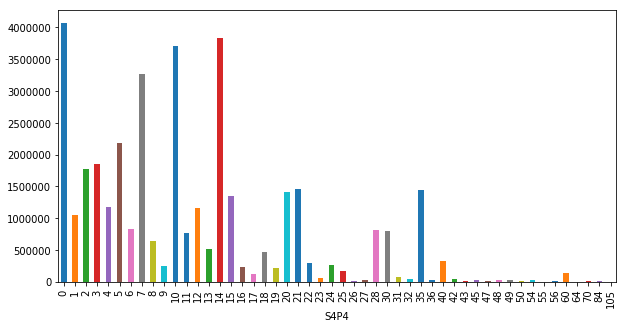

In [38]:
r4.plot(kind="bar", figsize=(10,5))

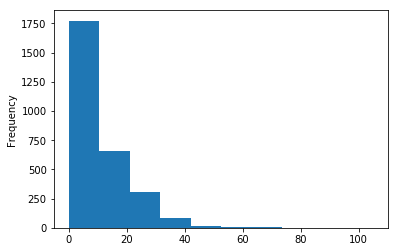

In [39]:
df["S4P4"].plot(kind="hist")

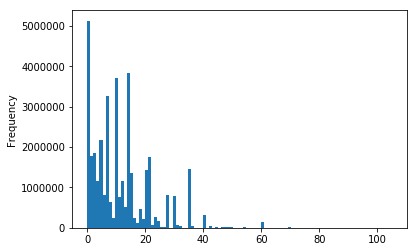

In [41]:
df["S4P4"].plot(kind="hist", weights=df["FAC"], bins=100)

In [49]:
lista = list(range(0, 140,1))

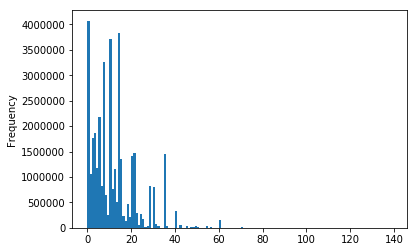

In [50]:
df["S4P4"].plot(kind="hist", weights=df["FAC"], bins=lista)

In [51]:
grupos = df.groupby("CD_A")

In [52]:
grupos.groups

{'01': Int64Index([ 720,  721,  722,  723,  724,  725,  726,  727,  728,  729,  730,
              731,  732,  733,  734,  735,  736,  737,  738,  739,  740,  741,
              742,  743,  744,  745,  746,  747,  748,  749,  750,  751,  752,
              753,  754,  755,  756,  757,  758,  759,  760,  761,  762,  763,
              764,  765,  766, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221,
             1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232,
             1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243,
             1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254,
             1255, 1256, 1257, 1258, 1259],
            dtype='int64'),
 '02': Int64Index([1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137,
             1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148,
             1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159,
             1160, 1161, 1162, 1163, 1164, 1165

In [53]:
grupos["FAC"].sum()

CD_A
01    14506491
02     2843404
03     3021275
04     1511882
05     1069758
07      792220
08      734557
09      629149
10      550028
12      536412
13      501863
14      624323
15      469992
16     1046488
17      563292
18      307015
19      478146
21     1136670
24      525420
25      556669
26      366309
27      319843
28      195575
29      630148
31      404233
32      194996
33      224351
36      693791
39      531659
40      195062
41      589391
43      307464
Name: FAC, dtype: int64

In [54]:
# Agrupa por ciudad, los que tienen y no acceso a internet
gruposb = df.groupby(["CD_A", "S4P10"])

In [56]:
gruposb.groups

{('01',
  0): Int64Index([726, 731, 736, 737, 742, 754, 761, 1234, 1236, 1240, 1248, 1252,
             1253],
            dtype='int64'),
 ('01',
  1): Int64Index([ 720,  721,  722,  723,  724,  725,  727,  728,  729,  730,  733,
              734,  735,  738,  739,  740,  741,  743,  744,  746,  747,  749,
              750,  751,  752,  753,  755,  757,  758,  759,  760,  762,  763,
              764,  765,  766, 1214, 1216, 1217, 1218, 1219, 1220, 1221, 1222,
             1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233,
             1237, 1238, 1239, 1241, 1243, 1244, 1245, 1246, 1247, 1249, 1250,
             1251, 1254, 1255, 1256, 1257, 1258, 1259],
            dtype='int64'),
 ('01', 2): Int64Index([732, 745, 748, 756, 1215, 1235, 1242], dtype='int64'),
 ('02',
  0): Int64Index([1128, 1133, 1148, 1154, 1176, 1190, 1208, 1211], dtype='int64'),
 ('02',
  1): Int64Index([1127, 1129, 1130, 1131, 1132, 1134, 1135, 1136, 1137, 1138, 1139,
             1140, 1141, 114

In [58]:
# Suma los que tienen o no acceso a internet por ciudad
parciales = gruposb["FAC"].sum()

In [62]:
totales = df.groupby("CD_A")["FAC"].sum()

In [69]:
# Porcentaje de las personas que responden que tienen o no acceso a internet
res = parciales / totales * 100
res[:10]

CD_A  S4P10
01    0        12.350733
      1        76.979264
      2        10.670003
02    0        13.285274
      1        79.105748
      2         7.608979
03    0         5.988267
      1        80.962938
      2        13.048796
04    0        12.649400
Name: FAC, dtype: float64

In [70]:
# Pásame los índices a una columna y hazme un nuevo index
plano = res.reset_index()

In [71]:
plano[:5]

,CD_A,S4P10,FAC
0,01,0,12.350733
1,01,1,76.979264
2,01,2,10.670003
3,02,0,13.285274
4,02,1,79.105748


In [76]:
filtrado = plano[plano["S4P10"] == 1]

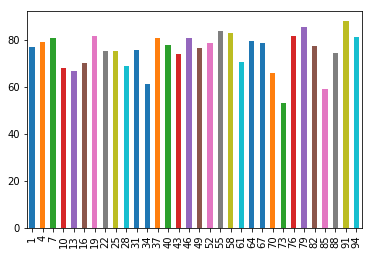

In [77]:
# Para todas las ciudades qué porcentaje tienen acceso a internet
filtrado["FAC"].plot(kind="bar")

In [80]:
nfiltrado = plano.set_index("CD_A")

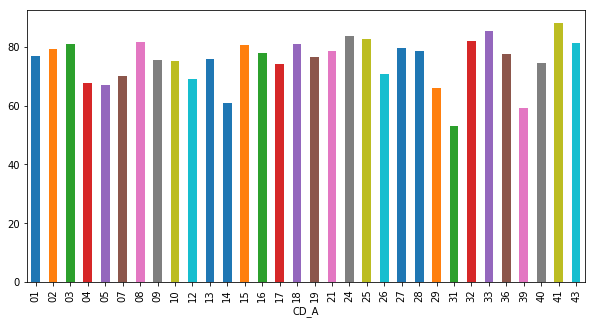

In [86]:
nfiltrado[nfiltrado["S4P10"]==1]["FAC"].plot(kind="bar", figsize=(10,5))

In [88]:
# Dame todas las llaves
df.keys()

Index(['CD_A', 'PER', 'ENT', 'CON', 'V_SEL', 'N_HOG', 'N_REN', 'S3P1',
       'S3P1_2', 'S3P2',
       ...
       'S4P17_6', 'S4P17_7', 'S4P17_8', 'S4P17_9', 'S4P17_10', 'S4P17_11',
       'S4P17_12', 'S4P17_13', 'S4P17_14', 'FAC'],
      dtype='object', length=236)

In [122]:
# Dame una serie con los valores de esa lista y muestra del 100 al 200
prelista = pd.Series(df.keys())[199:213]

In [123]:
# Convierte en una lista
lista = list(prelista)

In [124]:
# Agrega el element lista "FAC"
lista.append("FAC")

In [125]:
lista

['S4P15_1',
 'S4P15_2',
 'S4P15_3',
 'S4P15_4',
 'S4P15_5',
 'S4P15_6',
 'S4P15_7',
 'S4P15_8',
 'S4P15_9',
 'S4P15_10',
 'S4P15_11',
 'S4P15_12',
 'S4P15_13',
 'S4P15_14',
 'FAC']

In [126]:
df.loc[:, lista][:5]

,S4P15_1,S4P15_2,S4P15_3,S4P15_4,S4P15_5,S4P15_6,S4P15_7,S4P15_8,S4P15_9,S4P15_10,S4P15_11,S4P15_12,S4P15_13,S4P15_14,FAC
0,4,3,4,2,2,4,2,4,4,4,4,4,3,3,5072
1,2,2,4,4,2,5,4,2,2,5,4,2,2,5,5072
2,2,2,4,2,1,1,2,3,4,4,4,1,2,1,7608
3,4,4,4,2,2,2,4,2,4,4,4,2,2,2,10144
4,3,3,4,3,2,1,2,3,1,3,3,2,2,2,5072
